In [152]:
import pickle
import pandas as pd

with open('data_pickle_format/synethetic_vacancies_final.pickle', 'rb') as f:
    df = pickle.load(f)   
    
df['title'] = df['job_description'].str.extract(
    r'(?:Job\s*Title|Title):\s*(.*?)(?:\.|\n)\s*(?:Job\s*Description|Description):', 
    expand=False
)
df['description'] = df['job_description'].str.extract(r'(?:Job\s*Description|Description):\s*(.*)', expand=False)


In [153]:
import spacy

nlp = spacy.load("en_core_web_sm")

filter_and_lemma = []

for text in df['description']:
    if pd.notnull(text): 
        doc = nlp(text)
        filter_and_lemma.append([token.lemma_ for token in doc if not (token.is_stop or token.is_punct)])
    else:
        filter_and_lemma.append([])  
df['lemmas'] = filter_and_lemma

In [154]:
split_titles = []
for text in df['title']:
    if pd.notnull(text): 
        doc = nlp(text)
        split_titles.append([token.lower_ for token in doc if not (token.is_stop or token.is_punct)])
    else:
        split_titles.append([])  
df['split'] = split_titles

In [155]:
counts_1_4 = df.loc[df['women_proportion'] <= 0.25]
counts_2_4 = df.loc[(df['women_proportion'] > 0.25) & (df['women_proportion'] <= 0.5)]
counts_3_4 = df.loc[(df['women_proportion'] > 0.5) & (df['women_proportion'] <= 0.75)]
counts_4_4 = df.loc[df['women_proportion'] > 0.75]

# print(counts_1_4.count())
# print(counts_2_4.count())
# print(counts_3_4.count())
# print(counts_4_4.count())

In [156]:
from nltk import FreqDist
import numpy as np

lemmas_1 = counts_1_4['lemmas'].values
flat_1 = [lemma for sublist in lemmas_1 for lemma in sublist if lemma not in ("work", "role", "position", "look", "experience", "requirement", "ability", "require")]
 
freq_dic_1=FreqDist(flat_1)
display(freq_dic_1)

lemmas_2 = counts_2_4['lemmas'].values
flat_2 = [lemma for sublist in lemmas_2 for lemma in sublist if lemma not in ("work", "role", "position", "look", "experience", "requirement", "ability", "require")]
 
freq_dic_2=FreqDist(flat_2)
display(freq_dic_2)

lemmas_3 = counts_3_4['lemmas'].values
flat_3 = [lemma for sublist in lemmas_3 for lemma in sublist if lemma not in ("work", "role", "position", "look", "experience", "requirement", "ability", "require")]

freq_dic_3=FreqDist(flat_3)
display(freq_dic_3)

lemmas_4 = counts_4_4['lemmas'].values
flat_4 = [lemma for sublist in lemmas_4 for lemma in sublist if lemma not in ("work", "role", "position", "look", "experience", "requirement", "ability", "require")]
 
freq_dic_4=FreqDist(flat_4)
display(freq_dic_4)


FreqDist({'drive': 58, 'high': 54, 'analytical': 51, 'strong': 48, 'design': 40, 'degree': 32, 'independently': 32, 'technical': 32, 'security': 32, 'performance': 31, ...})

FreqDist({'team': 259, 'analytical': 255, 'technical': 242, 'skill': 240, 'strong': 232, 'high': 221, 'drive': 212, 'system': 168, 'degree': 166, 'design': 161, ...})

FreqDist({'team': 432, 'skill': 286, 'strong': 224, 'communication': 199, 'development': 154, 'collaborative': 151, 'design': 151, 'environment': 146, 'supportive': 145, 'technology': 142, ...})

FreqDist({'team': 80, 'skill': 50, 'help': 43, 'communication': 36, 'collaborative': 34, 'detail': 33, 'build': 32, 'user': 32, 'product': 31, 'supportive': 30, ...})

<Axes: title={'center': 'Fourth Quarter'}, xlabel='Samples', ylabel='Counts'>

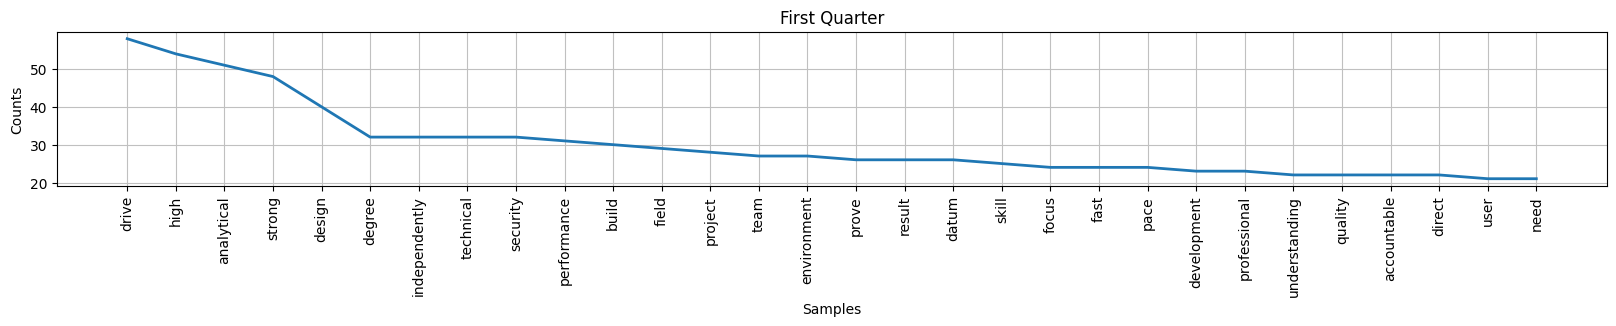

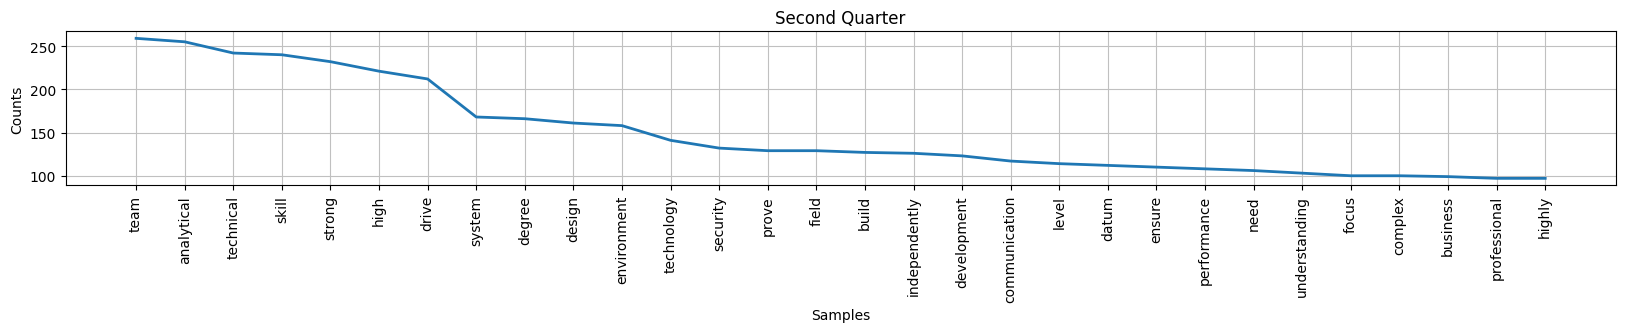

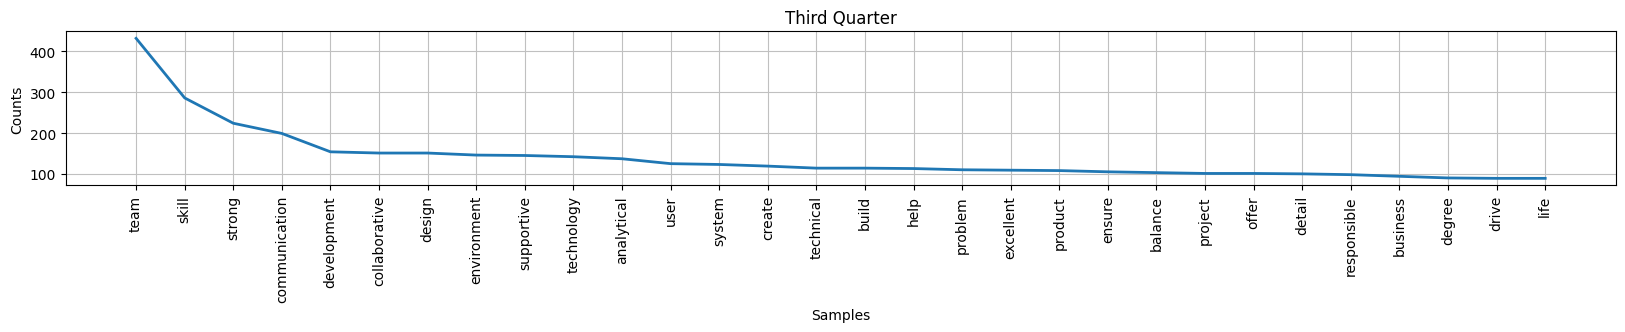

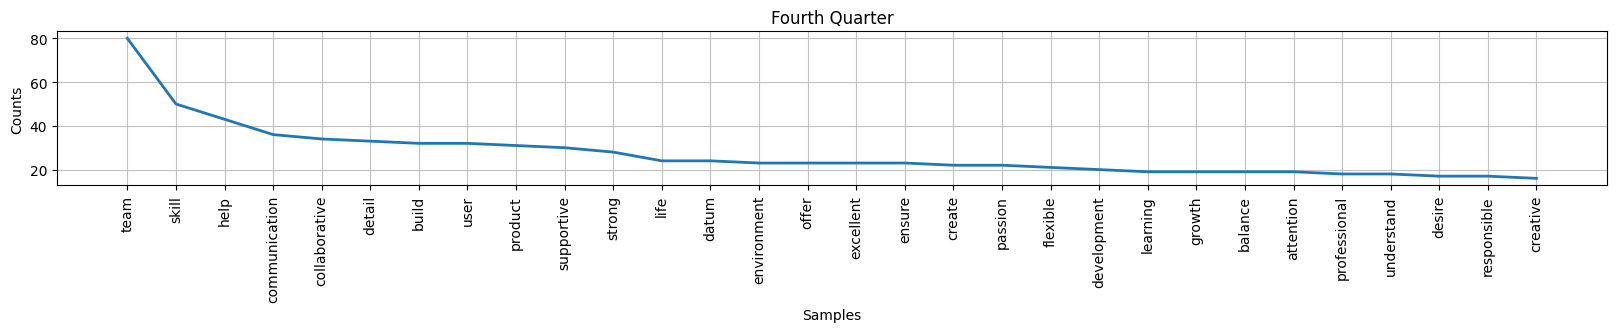

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '10'

plt.figure(figsize=(20,2))
freq_dic_1.plot(30,  title='First Quarter')
plt.figure(figsize=(20,2))
freq_dic_2.plot(30,  title='Second Quarter')
plt.figure(figsize=(20,2))
freq_dic_3.plot(30,  title='Third Quarter')
plt.figure(figsize=(20,2))
freq_dic_4.plot(30,  title='Fourth Quarter')

In [158]:
total_1 = len(flat_1)
total_2 = len(flat_2)
total_3 = len(flat_3)
total_4 = len(flat_4)

# Convert to frequency proportions
fd1 = {word: count / total_1 for word, count in freq_dic_1.items()}
fd2 = {word: count / total_2 for word, count in freq_dic_2.items()}
fd3 = {word: count / total_3 for word, count in freq_dic_3.items()}
fd4 = {word: count / total_4 for word, count in freq_dic_4.items()}

# All unique words
all_words = set(fd1) | set(fd2) | set(fd3) | set(fd4)

# Build normalized DataFrame
freq_df = pd.DataFrame({
    'word': list(all_words),
    'Q1': [fd1.get(word, 0) for word in all_words],
    'Q2': [fd2.get(word, 0) for word in all_words],
    'Q3': [fd3.get(word, 0) for word in all_words],
    'Q4': [fd4.get(word, 0) for word in all_words],
})

freq_df.set_index('word', inplace=True)
freq_df['total'] = freq_df.sum(axis=1)
freq_df = freq_df.sort_values(by='total', ascending=False)


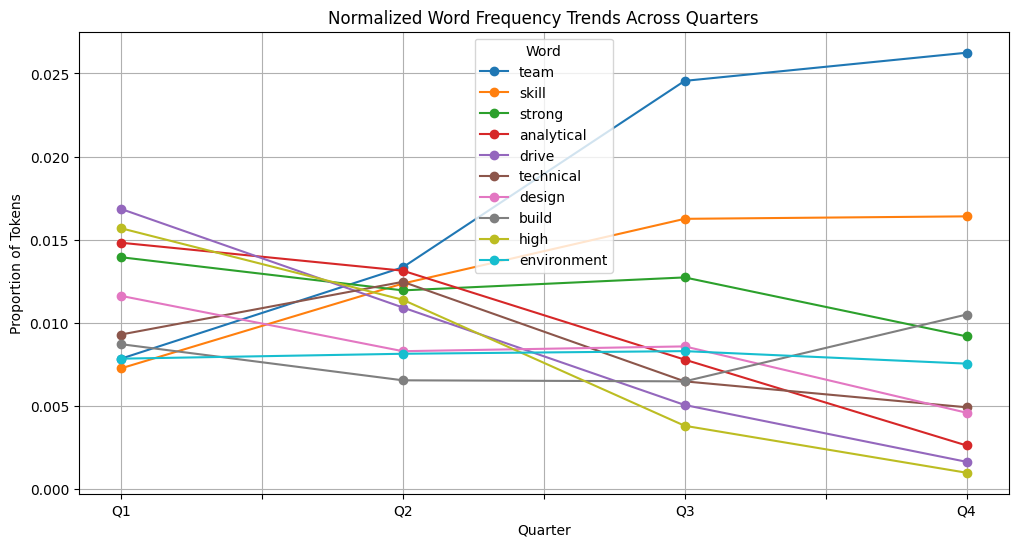

In [159]:
top_words = freq_df.head(10).index

freq_df.loc[top_words, ['Q1', 'Q2', 'Q3', 'Q4']].T.plot(
    kind='line', marker='o', figsize=(12, 6)
)
plt.title("Normalized Word Frequency Trends Across Quarters")
plt.xlabel("Quarter")
plt.ylabel("Proportion of Tokens")
plt.grid(True)
plt.legend(title="Word")
plt.show()


In [169]:
titles_1 = counts_1_4['split'].values
flattitle_1 = np.concatenate(titles_1).tolist()
 
title_freq_1=FreqDist(flattitle_1)
display(title_freq_1)

titles_2 = counts_2_4['split'].values
flattitle_2 = np.concatenate(titles_2).tolist()
 
title_freq_2=FreqDist(flattitle_2)
display(title_freq_2)

titles_3 = counts_3_4['split'].values
flattitle_3 = np.concatenate(titles_3).tolist()

title_freq_3=FreqDist(flattitle_3)
display(title_freq_3)

titles_4 = counts_4_4['split'].values
flattitle_4 = np.concatenate(titles_4).tolist()
 
title_freq_4=FreqDist(flattitle_4)
display(title_freq_4)

FreqDist({'developer': 7, 'manager': 5, 'engineer': 4, 'security': 3, 'user': 2, 'analyst': 2, 'data': 2, 'scientist': 2, 'administrator': 2, 'interface': 1, ...})

FreqDist({'engineer': 30, 'developer': 18, 'manager': 17, 'analyst': 17, 'architect': 16, 'systems': 12, 'data': 9, 'business': 9, 'administrator': 8, 'network': 8, ...})

FreqDist({'developer': 26, 'engineer': 19, 'manager': 16, 'analyst': 14, 'specialist': 14, 'data': 12, 'systems': 10, 'administrator': 7, 'coordinator': 7, 'designer': 7, ...})

FreqDist({'engineer': 7, 'specialist': 6, 'manager': 5, 'analyst': 4, 'product': 3, 'data': 3, 'developer': 2, 'user': 2, 'support': 2, 'learning': 2, ...})

<Axes: title={'center': 'Fourth Quarter'}, xlabel='Samples', ylabel='Counts'>

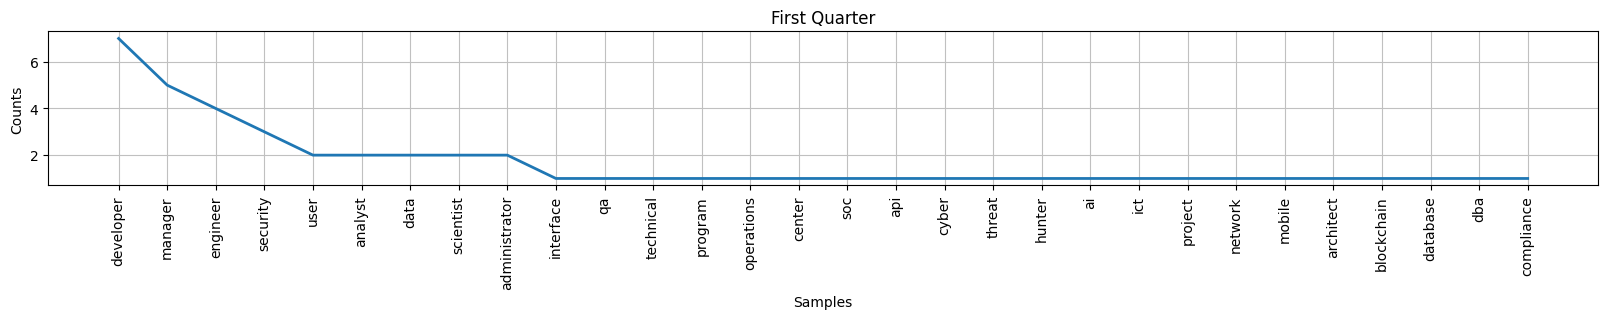

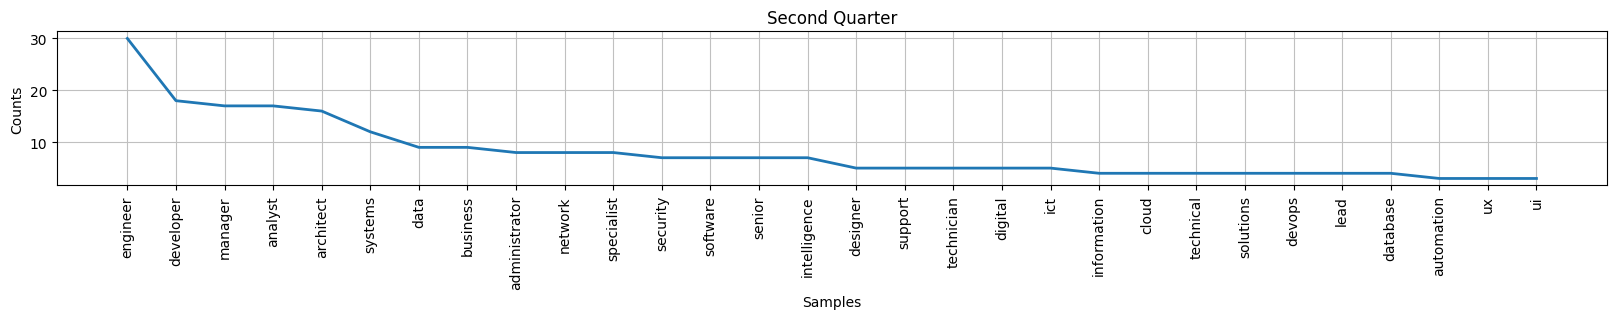

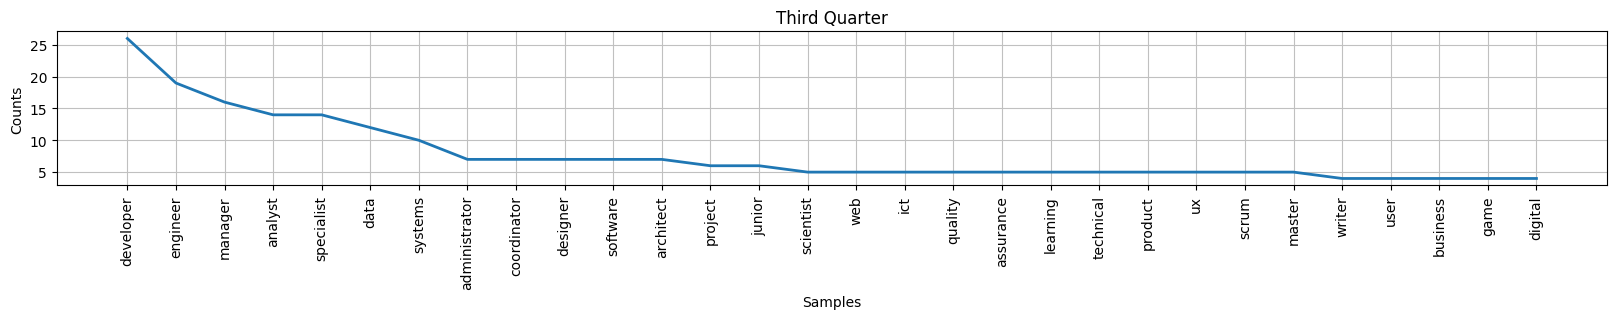

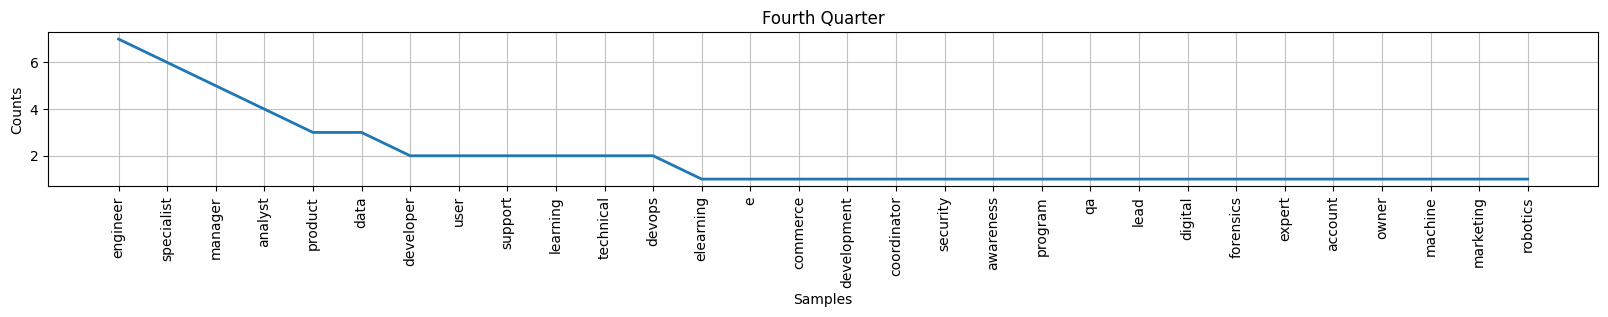

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '10'

plt.figure(figsize=(20,2))
title_freq_1.plot(30,  title='First Quarter')
plt.figure(figsize=(20,2))
title_freq_2.plot(30,  title='Second Quarter')
plt.figure(figsize=(20,2))
title_freq_3.plot(30,  title='Third Quarter')
plt.figure(figsize=(20,2))
title_freq_4.plot(30,  title='Fourth Quarter')

In [171]:
total_1 = len(flattitle_1)
total_2 = len(flattitle_2)
total_3 = len(flattitle_3)
total_4 = len(flattitle_4)

# Convert to frequency proportions
fd1 = {word: count / total_1 for word, count in title_freq_1.items()}
fd2 = {word: count / total_2 for word, count in title_freq_2.items()}
fd3 = {word: count / total_3 for word, count in title_freq_3.items()}
fd4 = {word: count / total_4 for word, count in title_freq_4.items()}

# All unique words
all_words = set(fd1) | set(fd2) | set(fd3) | set(fd4)

# Build normalized DataFrame
freq_df = pd.DataFrame({
    'word': list(all_words),
    'Q1': [fd1.get(word, 0) for word in all_words],
    'Q2': [fd2.get(word, 0) for word in all_words],
    'Q3': [fd3.get(word, 0) for word in all_words],
    'Q4': [fd4.get(word, 0) for word in all_words],
})

freq_df.set_index('word', inplace=True)
freq_df['total'] = freq_df.sum(axis=1)
freq_df = freq_df.sort_values(by='total', ascending=False)


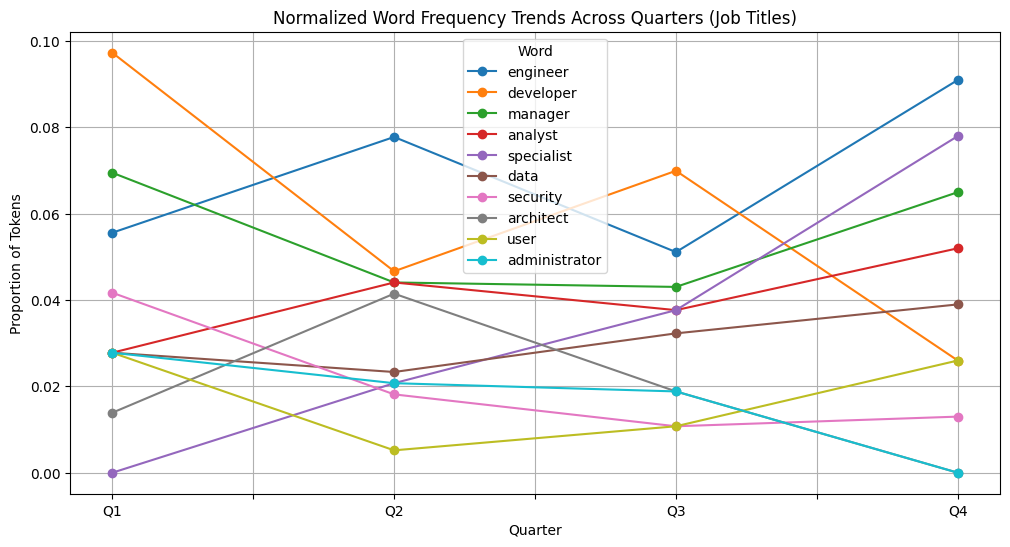

In [173]:
top_words = freq_df.head(10).index

freq_df.loc[top_words, ['Q1', 'Q2', 'Q3', 'Q4']].T.plot(
    kind='line', marker='o', figsize=(12, 6)
)
plt.title("Normalized Word Frequency Trends Across Quarters (Job Titles)")
plt.xlabel("Quarter")
plt.ylabel("Proportion of Tokens")
plt.grid(True)
plt.legend(title="Word")
plt.show()
